In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def p_norm(x, p):
    x = np.asarray(x)
    return np.sum(np.abs(x)**p, axis=-1)**(1/p)

def lp_circle(t, p):
    t = np.asarray(t)
    cost = np.cos(t)
    sint = np.sin(t)

    x = np.sign(cost) * np.abs(cost) ** (2.0 / p)
    y = np.sign(sint) * np.abs(sint) ** (2.0 / p)

    return np.stack((x, y), axis=-1)

def calculate_pi(p, N=200000):
    t = np.linspace(0.0, 2.0*np.pi, N, endpoint=True)
    dt = t[1] - t[0]

    gamma = lp_circle(t, p)
    dgamma = np.empty_like(gamma)
    dgamma[1:-1] = (gamma[2:] - gamma[:-2]) / (2.0 * dt)
    dgamma[0] = (gamma[1] - gamma[0]) / dt
    dgamma[-1] = (gamma[-1] - gamma[-2]) / dt
    speed = p_norm(dgamma, p)

    L = np.sum(speed) * dt
    return L / 2.0

Min π_p: 3.141608 ved p ≈ 2.0000


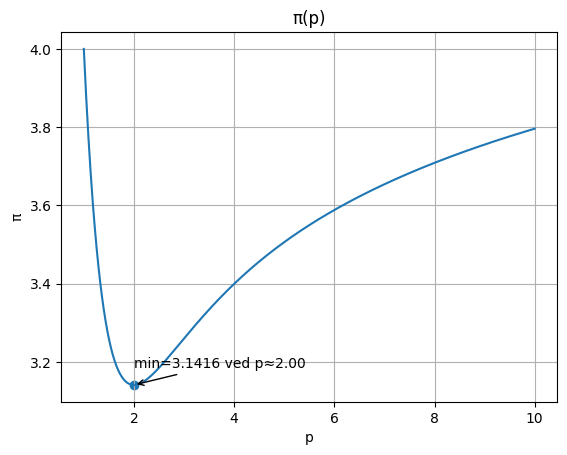

In [3]:
p_values = np.linspace(1.0, 10.0, 1000)
p_values = np.sort(np.append(p_values, 2.0))
pi_values = []

for p in p_values:
    pie = calculate_pi(p)
    pi_values.append(pie)

pi_p_values = np.array(pi_values)

plt.plot(p_values, pi_p_values)
plt.xlabel("p")
plt.ylabel("π")
plt.title("π(p)")
plt.grid(True)

idx = np.nanargmin(pi_p_values)
p_min = p_values[idx]
v_min = pi_p_values[idx]
plt.scatter([p_min], [v_min])
plt.annotate(f"min={v_min:.4f} ved p≈{p_min:.2f}",
             xy=(p_min, v_min),
             xytext=(p_min, v_min + 0.05*(np.nanmax(pi_p_values)-np.nanmin(pi_p_values))),
             arrowprops=dict(arrowstyle="->"))

print(f"Min π_p: {v_min:.6f} ved p ≈ {p_min:.4f}")

plt.show()